In [18]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
def data_descr(data, data_name=''):
    print(f'The dataset is: {data_name}', end='\n\n')
    display(data.info())
    
    print(f'Statistical information', end='\n\n')
    display(data.describe(include='all'))
    
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('The number of duplicates is', data.duplicated().sum(), '.')
    else:
        print('There are no duplicates in the data')
        
    print('The number of missing values per column in % ')
    report = data.isna().sum() / data.shape[0] * 100
    report = report.to_frame()
    report.rename(columns={0:'missing values in % of total'}, inplace =True)
    display(report)
    
data_descr(train, data_name="Mobile Price Classification")

The dataset is: Mobile Price Classification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g

None

Statistical information



battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

There are no duplicates in the data
The number of missing values per column in % 


missing values in % of total
battery_power                           0.0
blue                                    0.0
clock_speed                             0.0
dual_sim                                0.0
fc                                      0.0
four_g                                  0.0
int_memory                              0.0
m_dep                                   0.0
mobile_wt                               0.0
n_cores                                 0.0
pc                                      0.0
px_height                               0.0
px_width                                0.0
ram                                     0.0
sc_h                                    0.0
sc_w                                    0.0
talk_time                               0.0
three_g                                 0.0
touch_screen                            0.0
wifi                                    0.0
price_range                             0.0

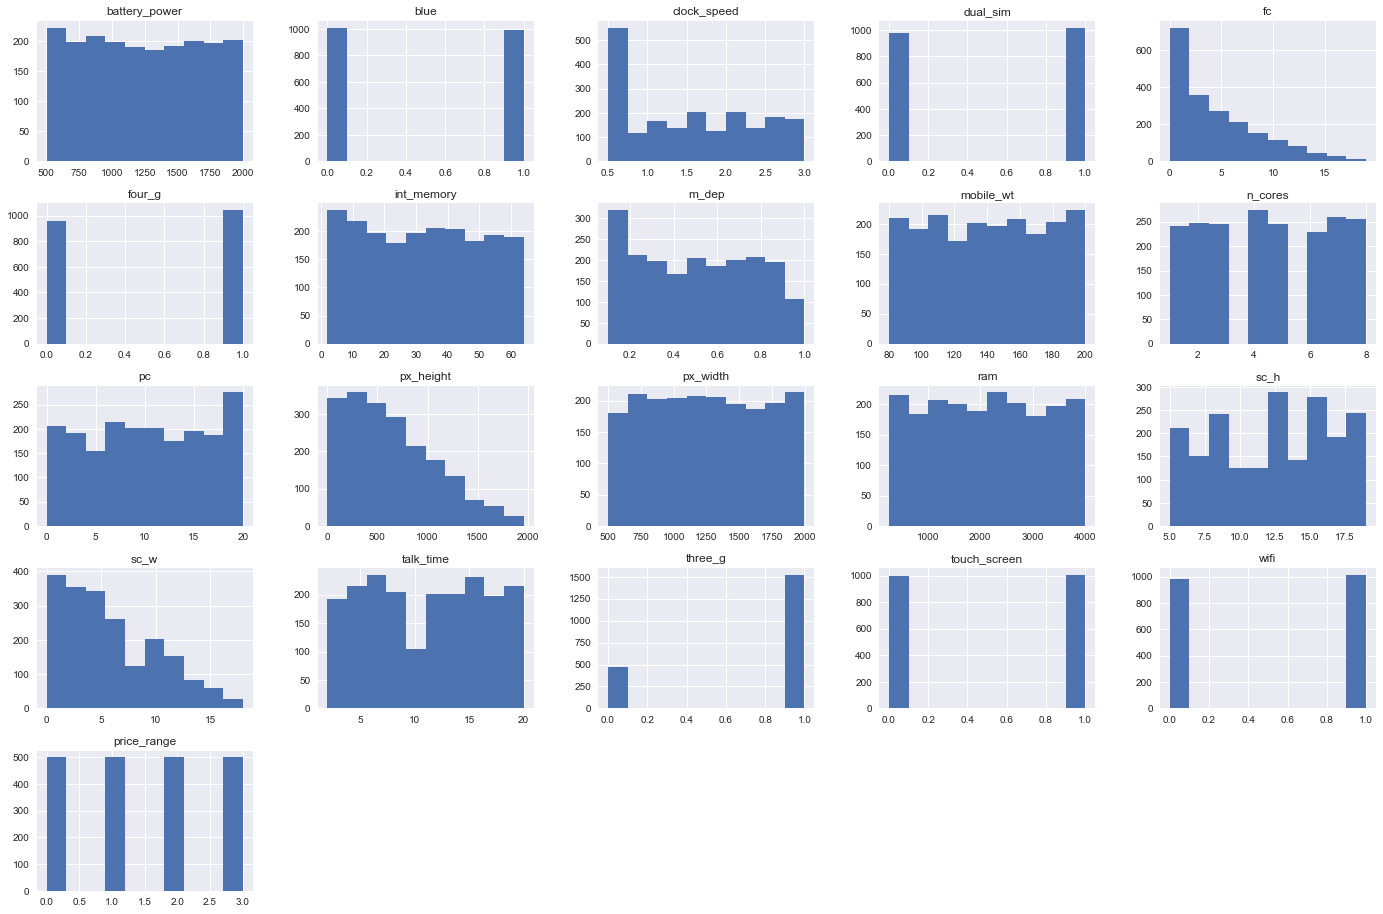

In [6]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
train.hist(figsize = (24, 16))
plt.show()

In [7]:
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot
# import plotly.io as pio
datahead=train.head(10)
datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
colorscale = "Greens"
table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
table.layout.width=2500
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 8
iplot(table)

/Users/maulaizzaazizi/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:590: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



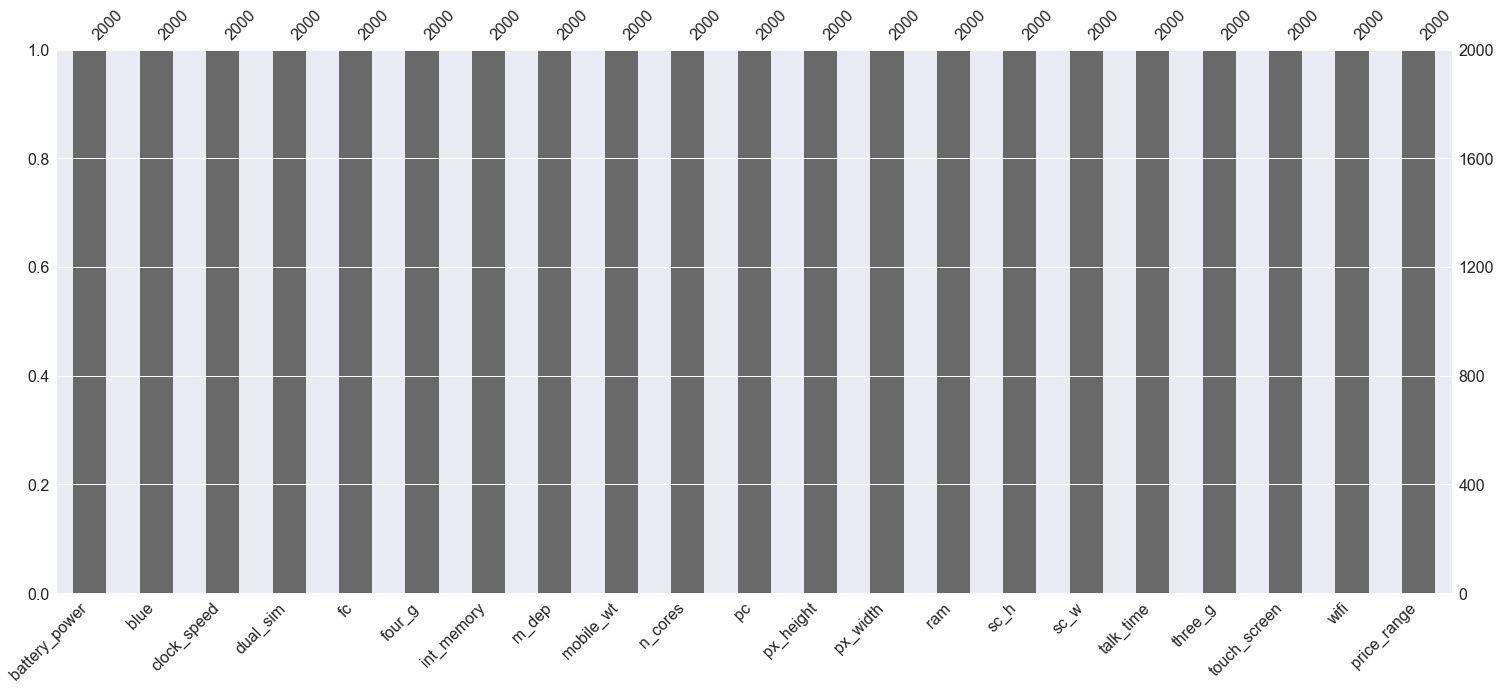

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(train)
plt.show()

## Correlation between features

Text(0.5, 1.0, 'Correlation ')

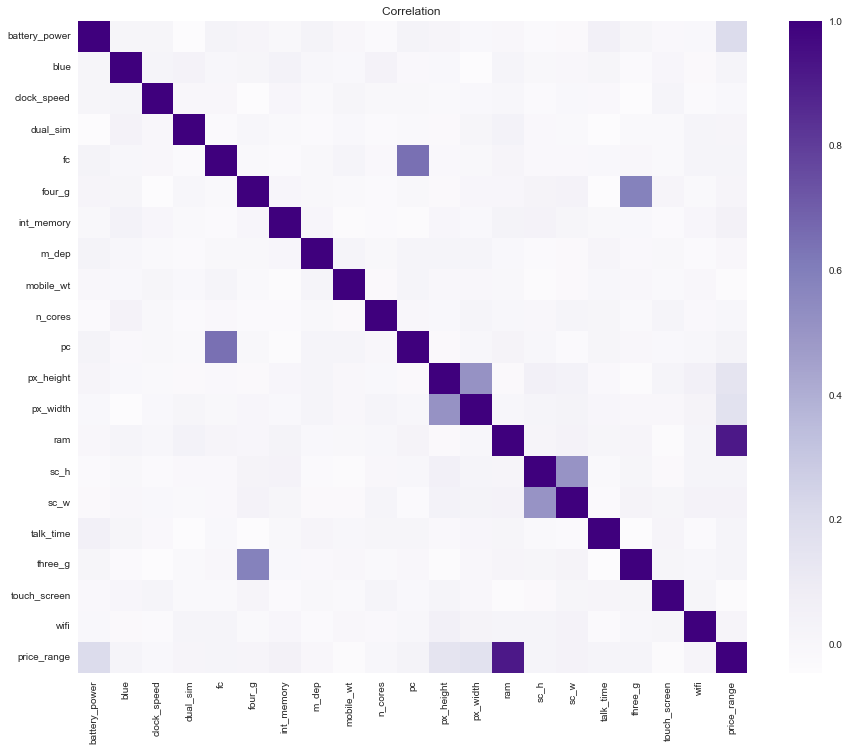

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

<AxesSubplot:>

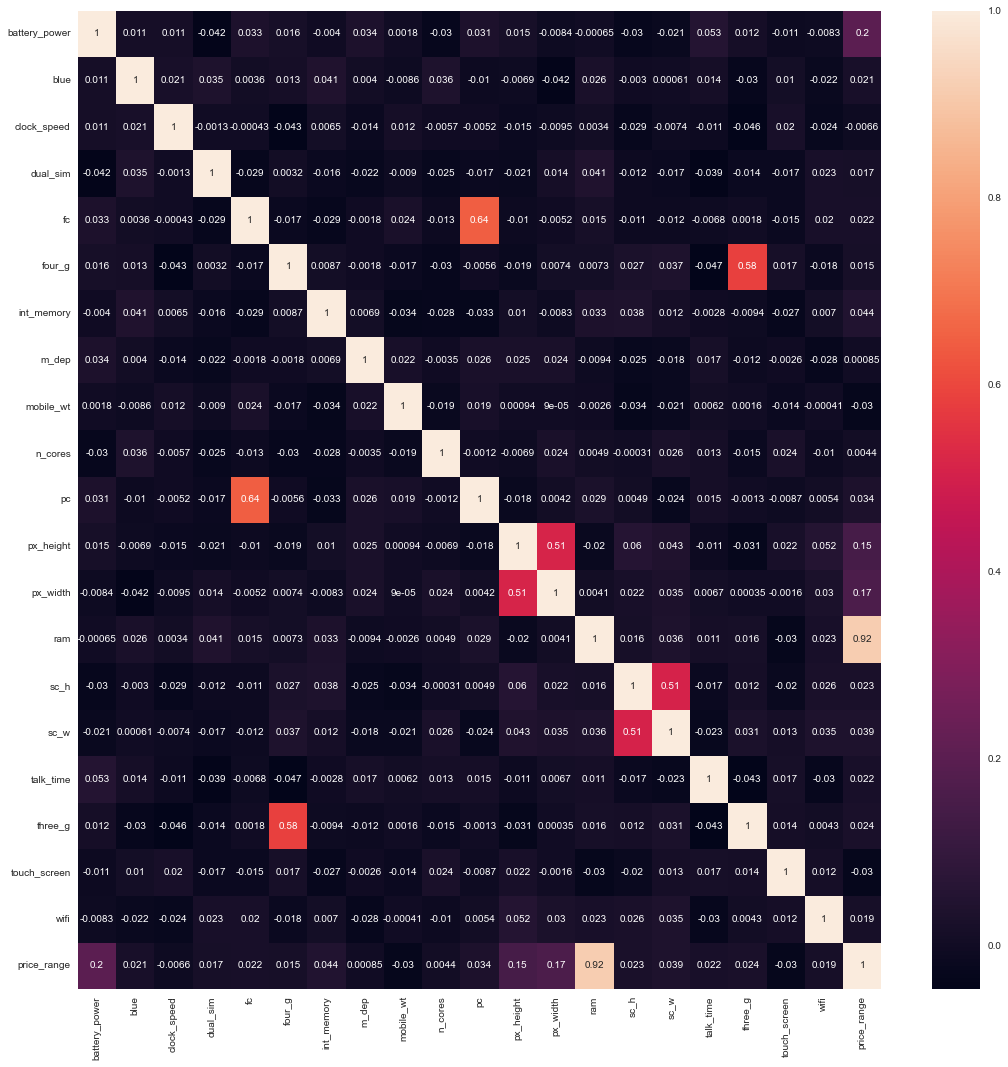

In [13]:
import seaborn as sns
plt.subplots(figsize = (18, 18))
sns.heatmap(train.corr(), annot=True)

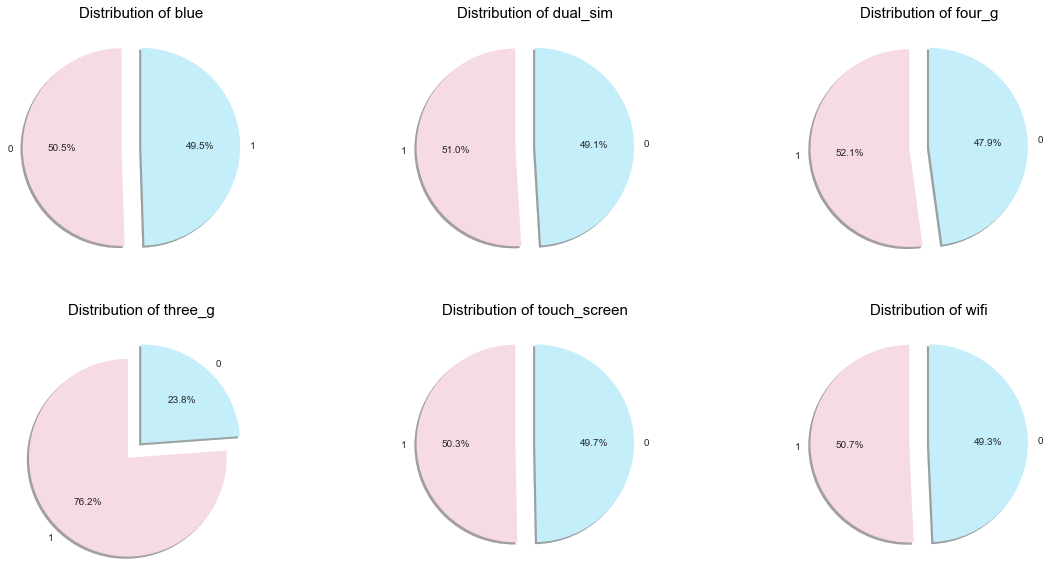

In [14]:
features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(20,10))
count = 0

for i in features:
    myexplode = [0.2, 0]
    
    colors = ['#f6dae4','#c3eefa']
    
    labels = train[i].value_counts().index
    sizes = train[i].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    plt.title(f'Distribution of {features[count]}', color = 'black',fontsize = 15)
    count += 1

/Users/maulaizzaazizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/maulaizzaazizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/maulaizzaazizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

Text(0.5, 1.0, 'mobile_wt Interval')

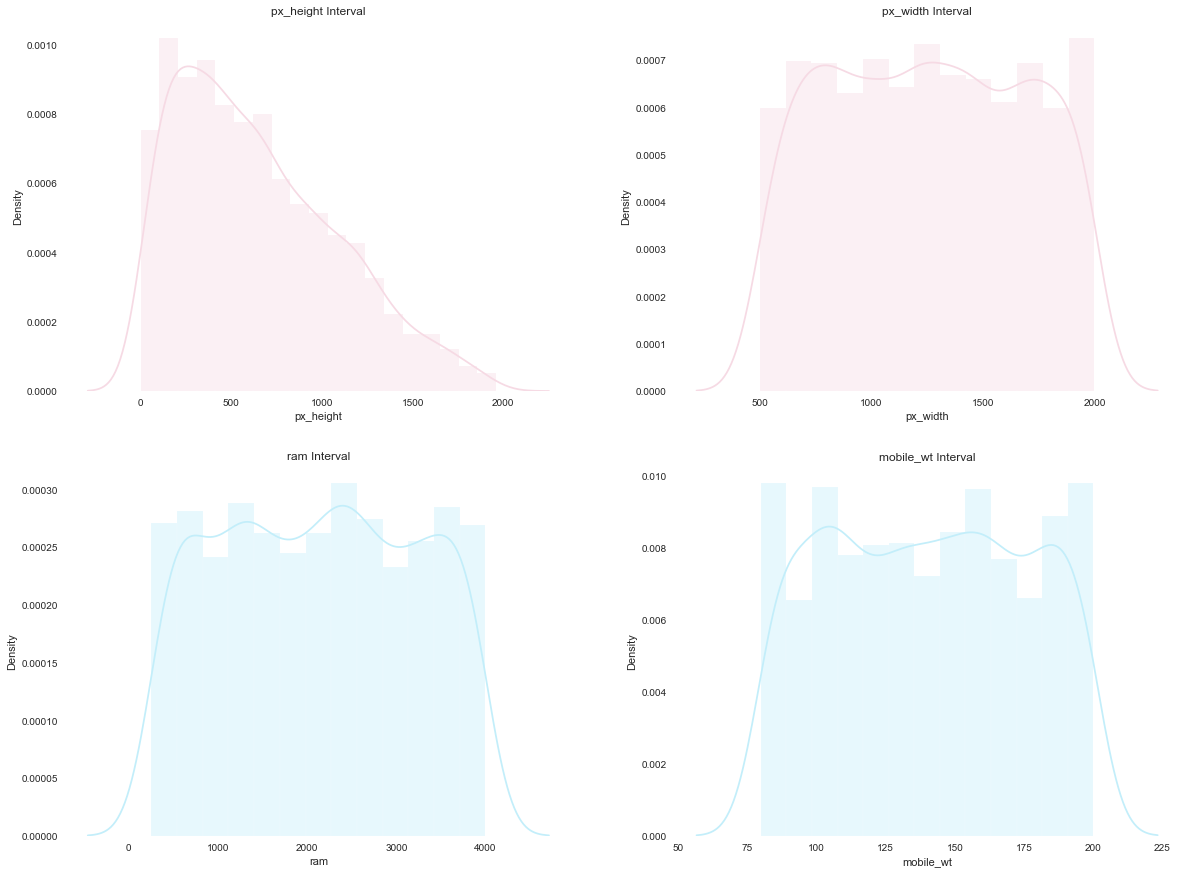

In [15]:
plt.figure(figsize=(20,15))
sns.set_style('white')
plt.subplot(2,2,1)
sns.distplot(train['px_height'], color="#f6dae4").set_title('px_height Interval')
plt.subplot(2,2,2)
sns.distplot(train['px_width'], color="#f6dae4").set_title('px_width Interval')
plt.subplot(2,2,3)
sns.distplot(train['ram'], color="#c3eefa").set_title('ram Interval')
plt.subplot(2,2,4)
sns.distplot(train['mobile_wt'], color="#c3eefa").set_title('mobile_wt Interval')

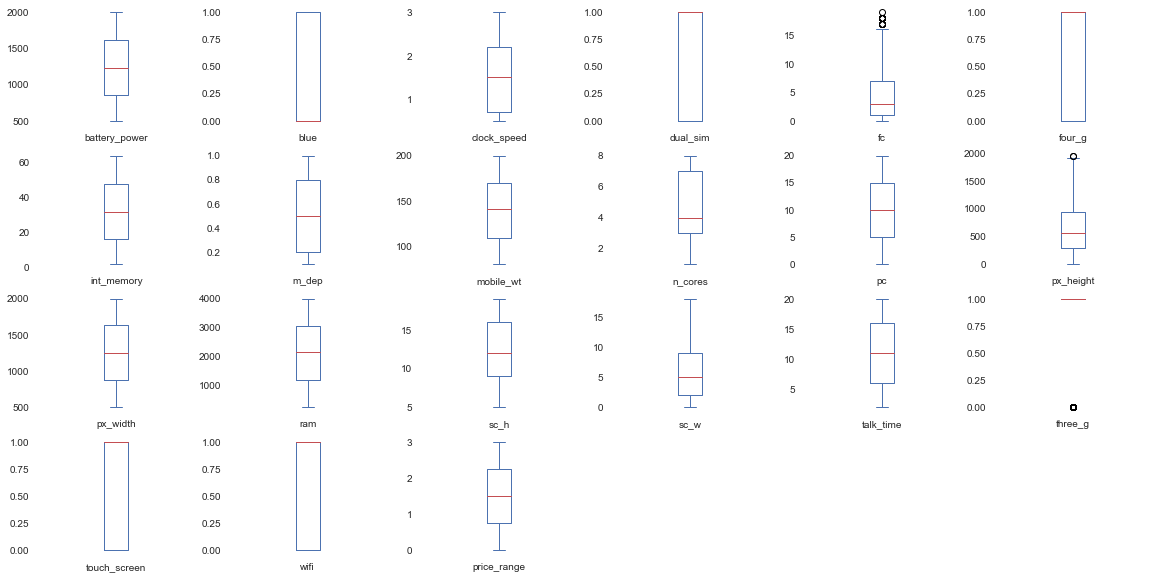

In [16]:
train.plot(kind = "box" , subplots = True , layout= (7,6), figsize =(20,18) )
plt.show()

## ANN

In [19]:
# convert to numpy arrays and split features from labels
x = train.drop('price_range', axis=1).values
x_predict = test.drop('id', axis=1).values
y =train['price_range'].values

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [22]:
# OneHot Encoding for labels  
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [24]:
from sklearn.model_selection import train_test_split
# Split the data into train and test datasets with ratio 9:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [26]:
pip install keras 

     |████████████████████████████████| 1.7 MB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install tensorflow

     |████████████████████████████████| 241.2 MB 39 kB/s  eta 0:00:01   |                                | 788 kB 1.7 MB/s eta 0:02:24     |█                               | 7.4 MB 2.0 MB/s eta 0:01:57     |███▊                            | 28.4 MB 2.3 MB/s eta 0:01:34     |█████                           | 38.0 MB 1.5 MB/s eta 0:02:12     |██████▍                         | 48.4 MB 725 kB/s eta 0:04:26     |██████████████▋                 | 110.4 MB 2.4 MB/s eta 0:00:56     |██████████████████▍             | 138.7 MB 2.2 MB/s eta 0:00:46     |███████████████████▌            | 146.6 MB 2.2 MB/s eta 0:00:44
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 1.7 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 1.7 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (1

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

2022-11-15 09:23:36.486422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
L1L2_model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])

L1L2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2022-11-15 09:24:34.789701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStoppingCallback = EarlyStopping(patience=50)

history = L1L2_model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

L1L2_model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9600


[0.20482854545116425, 0.9599999785423279]